<h1><center>Convolutional Neural Networks (CNNs)</center></h1>
<center><img src = "https://www.easy-tensorflow.com/images/NN/img1.png"></center>
<center>Fig1. CNN structure used for digit recognition</center>
<div><b>In this project we will implement a simple Convolutional Neural Network in TensorFlow with two convolutional layers, followed by two fully-connected layers at the end. The network structure is shown in the following figure and has classification accuracy of above 99% on MNIST data.</b></div>

<h2><center>Mnist Dataset Basic Approach</center></h2>

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("/home/rohit_psspl/Desktop/machine learning projects/tensor flow/data/MNIST_data/",one_hot=True)

Extracting /home/rohit_psspl/Desktop/machine learning projects/tensor flow/data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /home/rohit_psspl/Desktop/machine learning projects/tensor flow/data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/rohit_psspl/Desktop/machine learning projects/tensor flow/data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /home/rohit_psspl/Desktop/machine learning projects/tensor flow/data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
print("train : ",mnist.train.num_examples,"\n","Test : ",mnist.test.num_examples)

train :  55000 
 Test :  10000


In [23]:
mnist.train.images.shape     # the dimnesion of image is 28 x 28 which shape is 784

(55000, 784)

In [17]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

For img we reshape first to 28 x28

In [18]:
single_img = mnist.train.images[1].reshape(28,28)

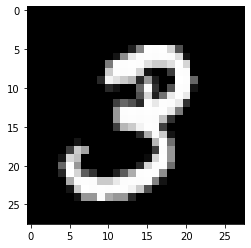

In [20]:
# plt.imshow(single_img)
plt.imshow(single_img,cmap='gist_gray')

In [26]:
print("Min : ",single_img.min(),"\n","Max : ",single_img.max())

Min :  0.0 
 Max :  1.0


In [21]:
sec_img = mnist.train.images[2].reshape(28,28)

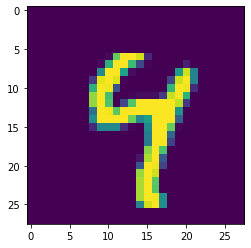

In [22]:
plt.imshow(sec_img)

In [28]:
# y = mx + c

x =tf.placeholder(tf.float32,shape=[None,784])

In [30]:
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
y = tf.matmul(x,w) + b

In [33]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [34]:
# Loss Function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y ))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [35]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [38]:
train = optimizer.minimize(cross_entropy)

In [40]:
init = tf.global_variables_initializer()

In [42]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict = {x:batch_x,y_true:batch_y})
    
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9163
